In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 45.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np


In [ ]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 1214
Dental Caries: 1596
Bone Lost: 1788


In [ ]:
def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
folder_path = "/content/drive/MyDrive/New Dataset/Extra Teeth"
for img in os.listdir(folder_path):
    simg_path = os.path.join(folder_path,img)
    print(simg_path)


    image_file=simg_path
    Folder_name=folder_path
    Extension=image_file.split("/")[-1]
    image=cv2.imread(image_file)

    flip_image(image,-1)#both



In [ ]:
def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
folder_path = "/content/drive/MyDrive/New Dataset/Bone Lost"
for img in os.listdir(folder_path):
    simg_path = os.path.join(folder_path,img)
    print(simg_path)


    image_file=simg_path
    Folder_name=folder_path
    Extension=image_file.split("/")[-1]
    image=cv2.imread(image_file)

    flip_image(image,-1)#both



In [ ]:
def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
folder_path = "/content/drive/MyDrive/New Dataset/Dental Caries"
for img in os.listdir(folder_path):
    simg_path = os.path.join(folder_path,img)
    print(simg_path)


    image_file=simg_path
    Folder_name=folder_path
    Extension=image_file.split("/")[-1]
    image=cv2.imread(image_file)

    flip_image(image,-1)#both



In [ ]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = data_num
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='mediumpurple',
        width = 0.4)

plt.xlabel("Teeth image type")
plt.ylabel("No. of images")
plt.title("Number of Images")
plt.show()

In [ ]:


import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np



#RESIZE
def resize_image(image,w,h):
    image=cv2.resize(image,(w,h))
    cv2.imwrite(Folder_name+"/Resize-"+str(w)+"*"+str(h)+Extension, image)

#crop
def crop_image(image,y1,y2,x1,x2):
    image=image[y1:y2,x1:x2]
    cv2.imwrite(Folder_name+"/Crop-"+str(x1)+str(x2)+"*"+str(y1)+str(y2)+Extension, image)

def padding_image(image,topBorder,bottomBorder,leftBorder,rightBorder,color_of_border=[0,0,0]):
    image = cv2.copyMakeBorder(image,topBorder,bottomBorder,leftBorder,
        rightBorder,cv2.BORDER_CONSTANT,value=color_of_border)
    cv2.imwrite(Folder_name + "/padd-" + str(topBorder) + str(bottomBorder) + "*" + str(leftBorder) + str(rightBorder) + Extension, image)

def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)

def superpixel_image(image,segments):
    seg=segments

    def segment_colorfulness(image, mask):

        (B, G, R) = cv2.split(image.astype("float"))
        R = np.ma.masked_array(R, mask=mask)
        G = np.ma.masked_array(B, mask=mask)
        B = np.ma.masked_array(B, mask=mask)


        rg = np.absolute(R - G)


        yb = np.absolute(0.5 * (R + G) - B)


        stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
        meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))


        return stdRoot + (0.3 * meanRoot)

    orig = cv2.imread(image)
    vis = np.zeros(orig.shape[:2], dtype="float")


    image = io.imread(image)
    segments = slic(img_as_float(image), n_segments=segments,
                    slic_zero=True)
    for v in np.unique(segments):

        mask = np.ones(image.shape[:2])
        mask[segments == v] = 0


        C = segment_colorfulness(orig, mask)
        vis[segments == v] = C

    vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")


    alpha = 0.6
    overlay = np.dstack([vis] * 3)
    output = orig.copy()
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    cv2.imwrite(Folder_name + "/superpixels-" + str(seg) + Extension, output)

def invert_image(image,channel):

    image=(channel-image)
    cv2.imwrite(Folder_name + "/invert-"+str(channel)+Extension, image)

def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark-" + str(gamma) + Extension, image)

def add_light_color(image, color, gamma=1.0):
    invGamma = 1.0 / gamma
    image = (color - image)
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light_color-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark_color" + str(gamma) + Extension, image)

def saturation_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/saturation-" + str(saturation) + Extension, image)

def hue_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name +"/hue-" + str(saturation) + Extension, image)




In [ ]:

import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
#Load the dataset
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/New Dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4598 files belonging to 3 classes.


In [ ]:
#Class name in my dataset
class_name=dataset.class_names
class_name


['Bone Lost', 'Dental Caries', 'Extra Teeth']

In [ ]:
# #image shape
# for image_batch, labels_batch in dataset.take(1):
#     print(image_batch.shape)
#     print(labels_batch.numpy())

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[106.        99.       105.      ]
  [106.        99.15719  105.15719 ]
  [106.        99.595314 105.595314]
  ...
  [ 99.14035   89.33099  102.52164 ]
  [112.28458  101.59894  113.9133  ]
  [117.       106.       118.      ]]

 [[102.49498   95.056854 101.49498 ]
  [102.49498   95.28291  101.65217 ]
  [102.49498   95.912994 102.090294]
  ...
  [105.869064  96.05971  109.42765 ]
  [117.28564  106.6      119.283615]
  [121.38127  110.38127  122.8194  ]]

 [[ 97.49164   89.49164   96.49164 ]
  [ 97.55157   89.86595   96.708755]
  [ 97.71861   90.90925   97.31393 ]
  ...
  [113.48301  103.63582  117.243256]
  [122.82317  112.12755  125.24116 ]
  [126.17391  115.17391  128.11037 ]]

 ...

 [[ 86.65198   78.715515  89.65198 ]
  [ 85.64891   78.3412    88.97328 ]
  [ 82.85312   77.29793   87.08158 ]
  ...
  [ 90.46127   82.44916   93.42345 ]
  [ 92.57574   84.6193    95.56575 ]
  [ 93.33429   85.39783   96.33429 ]]

 [[ 94.551865  87.11374   97.551865]
  [ 93.962006  87.15264   97.36471 ]


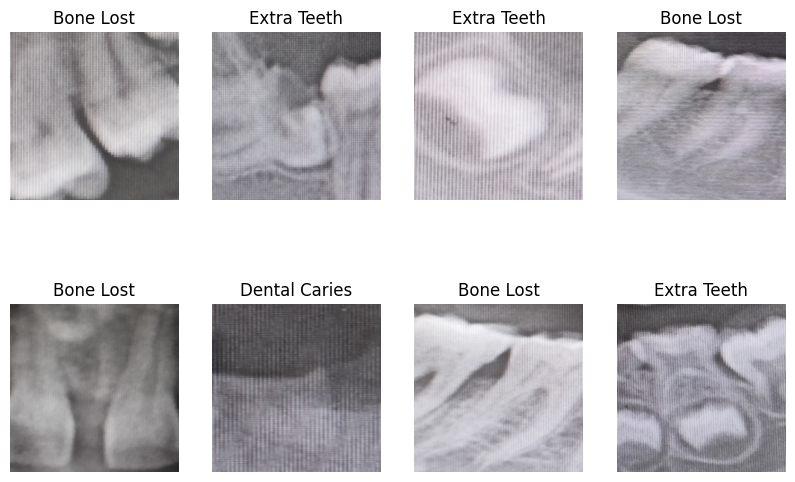

In [ ]:
#some data visualization for understanding
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(2):
  for i in range(8):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")

Splitting

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Model Implementation


# EfficientNetB7

In [ ]:
 #model
from tensorflow.keras.applications import EfficientNetB7
conv_base = EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
100/100 [==============================] - 107s 870ms/step - loss: 0.6290 - accuracy: 0.7298 - val_loss: 0.4175 - val_accuracy: 0.8371
Epoch 2/20
100/100 [==============================] - 85s 852ms/step - loss: 0.4069 - accuracy: 0.8295 - val_loss: 0.3873 - val_accuracy: 0.8504
Epoch 3/20
100/100 [==============================] - 86s 867ms/step - loss: 0.3425 - accuracy: 0.8611 - val_loss: 0.3346 - val_accuracy: 0.8772
Epoch 4/20
100/100 [==============================] - 88s 877ms/step - loss: 0.2756 - accuracy: 0.8931 - val_loss: 0.2656 - val_accuracy: 0.9074
Epoch 5/20
100/100 [==============================] - 88s 885ms/step - loss: 0.2506 - accuracy: 0.8947 - val_loss: 0.2624 - val_accuracy: 0.9096
Epoch 6/20
100/100 [==============================] - 88s 886ms/step - loss: 0.2137 - accuracy: 0.9100 - val_loss: 0.2465 - val_accuracy: 0.9163
Epoch 7/20
100/100 [==============================] - 88s 885ms/step - loss: 0.2064 - accuracy: 0.9229 - val_loss: 0.2554 - val_a

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

16/16 [==============================] - 11s 667ms/step - loss: 0.2300 - accuracy: 0.9531


first image to predict
actual label: Dental Caries
1/1 [==============================] - 6s 6s/step
predicted label: Dental Caries


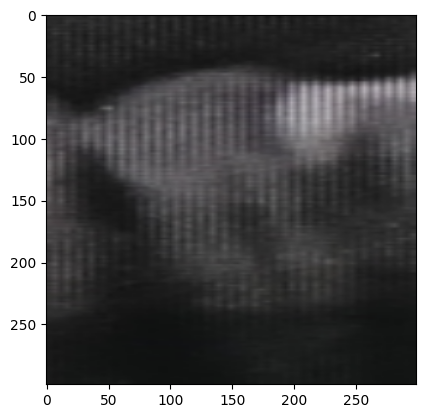

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


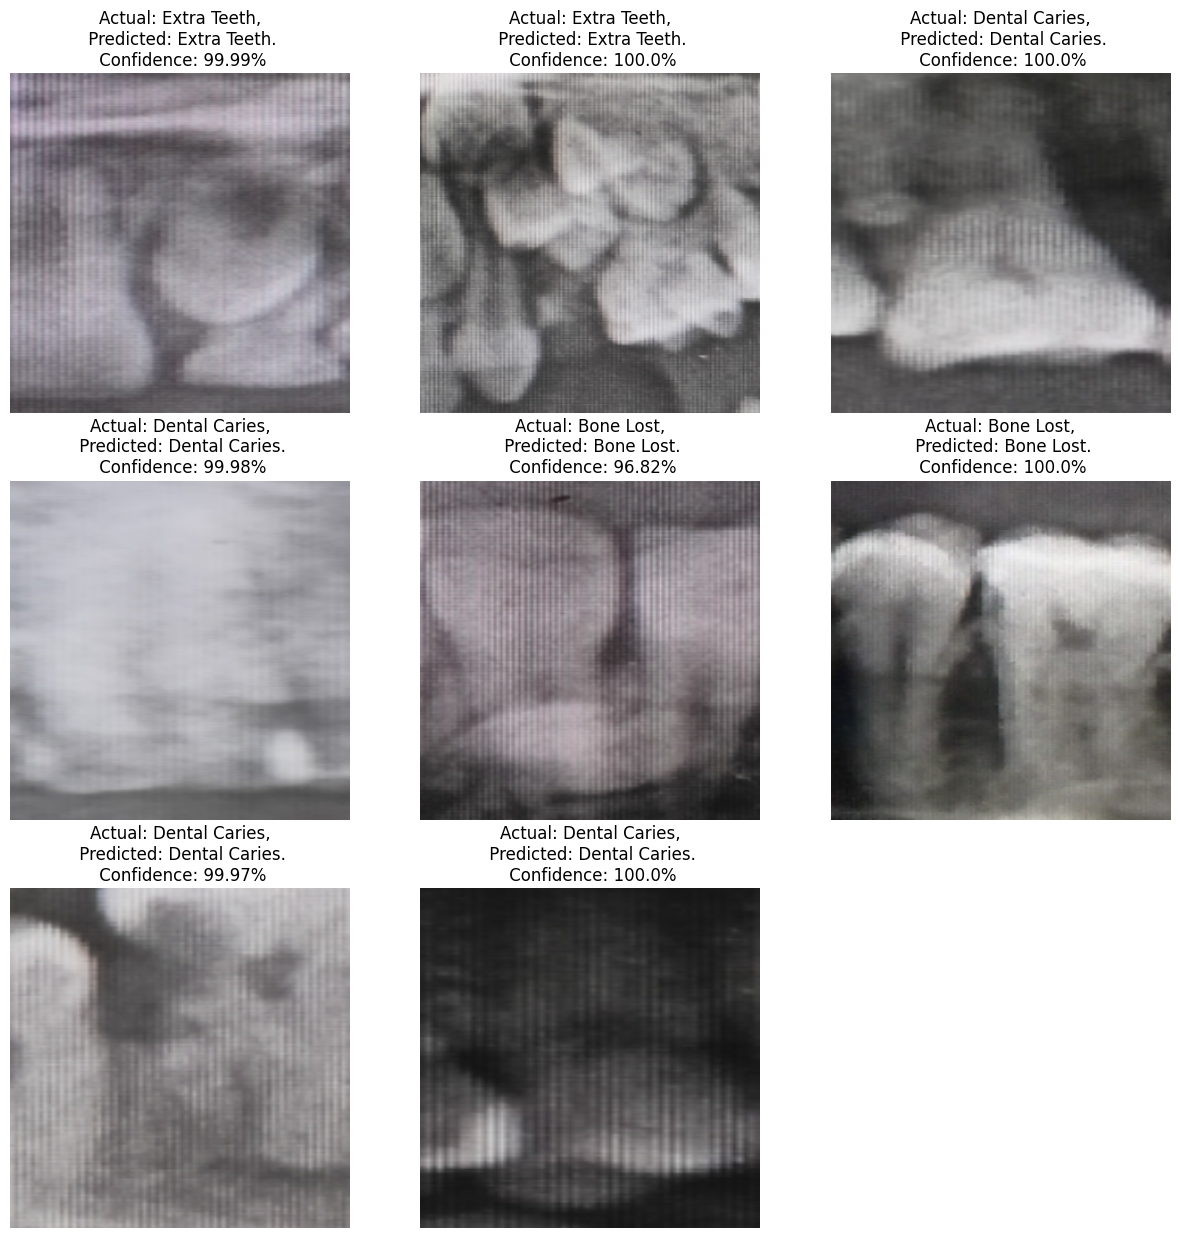

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

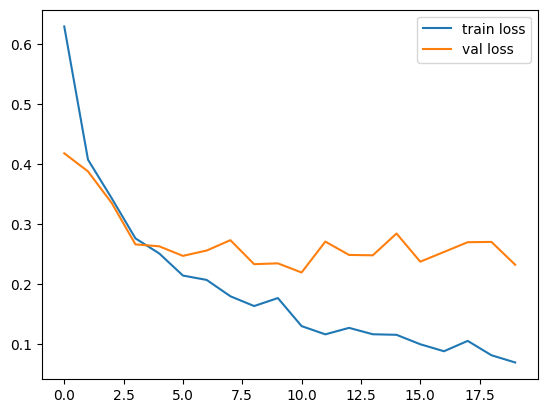

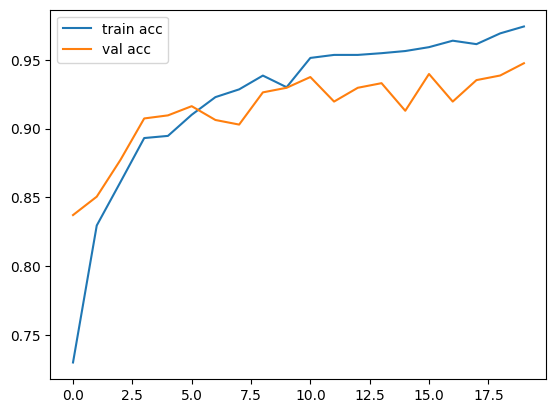

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(8):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    # print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 46ms/step


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.95454545 0.93333333 1.        ]
recall: [0.93333333 0.97674419 0.975     ]
fscore: [0.94382022 0.95454545 0.98734177]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[42,  3,  0],
       [ 1, 42,  0],
       [ 1,  0, 39]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


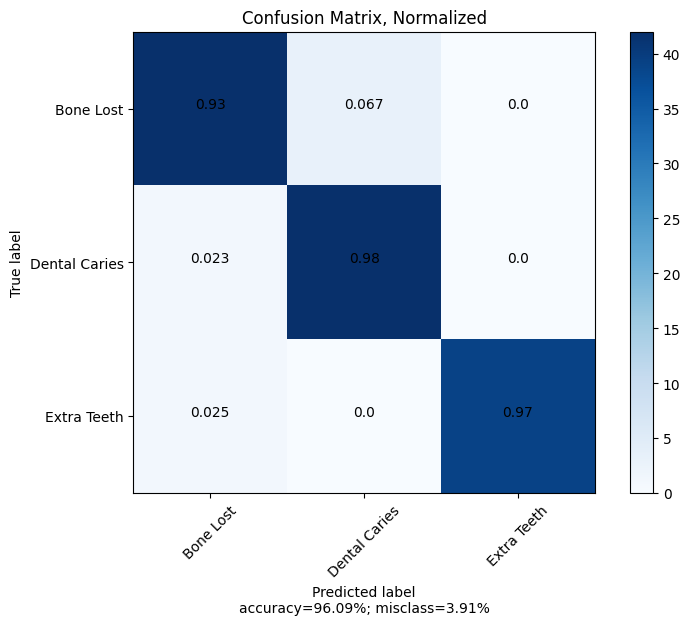

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

# Resnet50

In [ ]:
#Resnet50 model
conv_base = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
100/100 [==============================] - 27s 239ms/step - loss: 0.7556 - accuracy: 0.7085 - val_loss: 0.4774 - val_accuracy: 0.8058
Epoch 2/20
100/100 [==============================] - 23s 233ms/step - loss: 0.4334 - accuracy: 0.8238 - val_loss: 0.4262 - val_accuracy: 0.8292
Epoch 3/20
100/100 [==============================] - 23s 232ms/step - loss: 0.3815 - accuracy: 0.8442 - val_loss: 0.3283 - val_accuracy: 0.8940
Epoch 4/20
100/100 [==============================] - 23s 233ms/step - loss: 0.3215 - accuracy: 0.8668 - val_loss: 0.3952 - val_accuracy: 0.8237
Epoch 5/20
100/100 [==============================] - 23s 233ms/step - loss: 0.2947 - accuracy: 0.8846 - val_loss: 0.3251 - val_accuracy: 0.8772
Epoch 6/20
100/100 [==============================] - 23s 233ms/step - loss: 0.2606 - accuracy: 0.8947 - val_loss: 0.3073 - val_accuracy: 0.8973
Epoch 7/20
100/100 [==============================] - 23s 234ms/step - loss: 0.2193 - accuracy: 0.9191 - val_loss: 0.2492 - val_ac

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

16/16 [==============================] - 3s 188ms/step - loss: 0.1858 - accuracy: 0.9512


first image to predict
actual label: Dental Caries
1/1 [==============================] - 1s 902ms/step
predicted label: Dental Caries


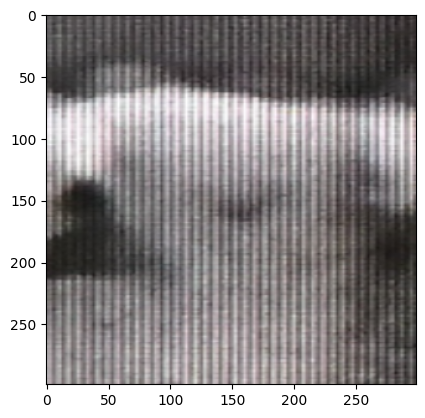

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


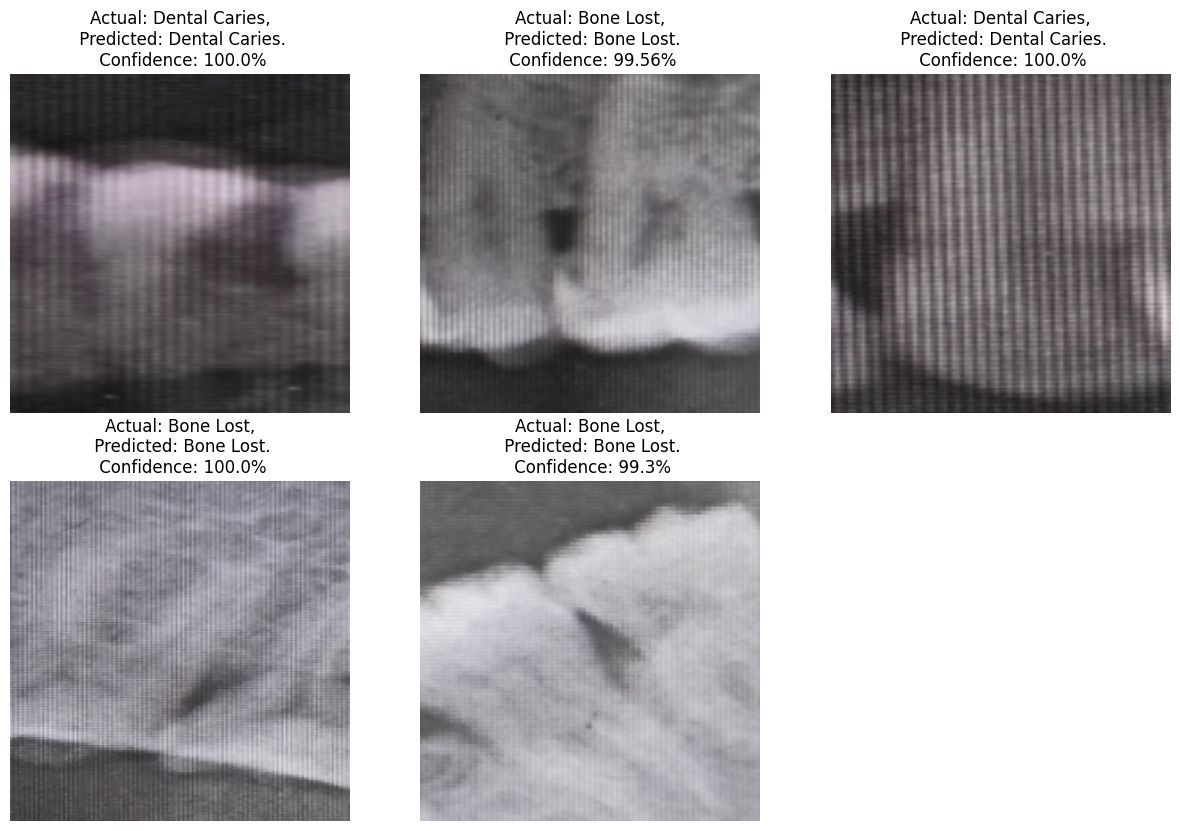

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

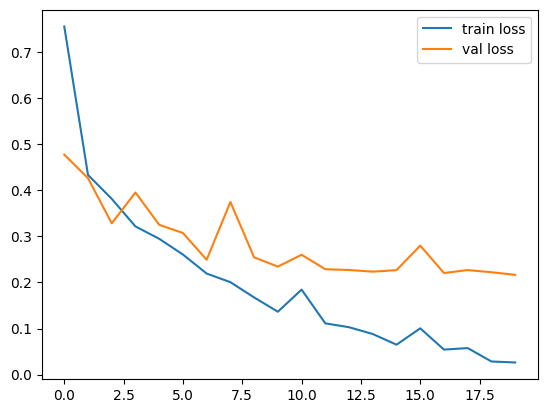

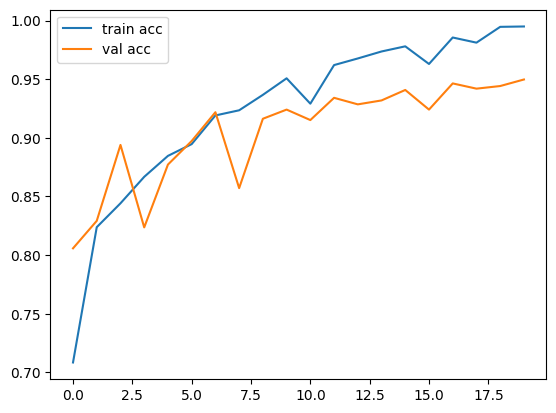

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 23ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 23ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 22ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 22ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 21ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 22ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 21ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 22ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 22ms/step
Extra Teeth Bone Lost
1/1 [==============================] - 0s 22ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 21ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 21ms/step
Bone Lost Bone Lost
1/1 [=========

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [1.         0.96551724 0.95652174]
recall: [0.93333333 1.         1.        ]
fscore: [0.96551724 0.98245614 0.97777778]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[28,  1,  1],
       [ 0, 28,  0],
       [ 0,  0, 22]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


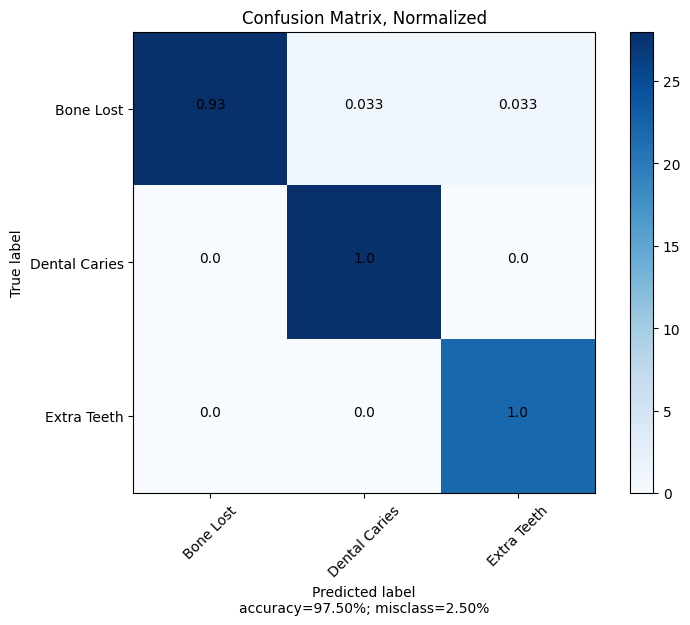

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##VGG 16

In [ ]:
#vgg16 model
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
100/100 [==============================] - 35s 339ms/step - loss: 0.9306 - accuracy: 0.6583 - val_loss: 0.5136 - val_accuracy: 0.7891
Epoch 2/20
100/100 [==============================] - 34s 339ms/step - loss: 0.4956 - accuracy: 0.7950 - val_loss: 0.4870 - val_accuracy: 0.7891
Epoch 3/20
100/100 [==============================] - 34s 341ms/step - loss: 0.3974 - accuracy: 0.8382 - val_loss: 0.3884 - val_accuracy: 0.8371
Epoch 4/20
100/100 [==============================] - 34s 342ms/step - loss: 0.3145 - accuracy: 0.8734 - val_loss: 0.3200 - val_accuracy: 0.8694
Epoch 5/20
100/100 [==============================] - 34s 343ms/step - loss: 0.2850 - accuracy: 0.8862 - val_loss: 0.3578 - val_accuracy: 0.8661
Epoch 6/20
100/100 [==============================] - 34s 344ms/step - loss: 0.2216 - accuracy: 0.9122 - val_loss: 0.3661 - val_accuracy: 0.8839
Epoch 7/20
100/100 [==============================] - 34s 344ms/step - loss: 0.1936 - accuracy: 0.9248 - val_loss: 0.3843 - val_ac

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

16/16 [==============================] - 4s 270ms/step - loss: 0.3076 - accuracy: 0.9219


first image to predict
actual label: Bone Lost
1/1 [==============================] - 0s 169ms/step
predicted label: Bone Lost


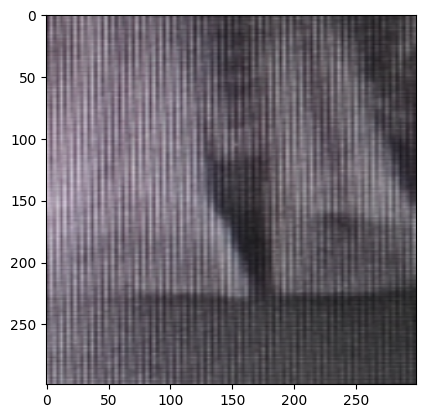

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


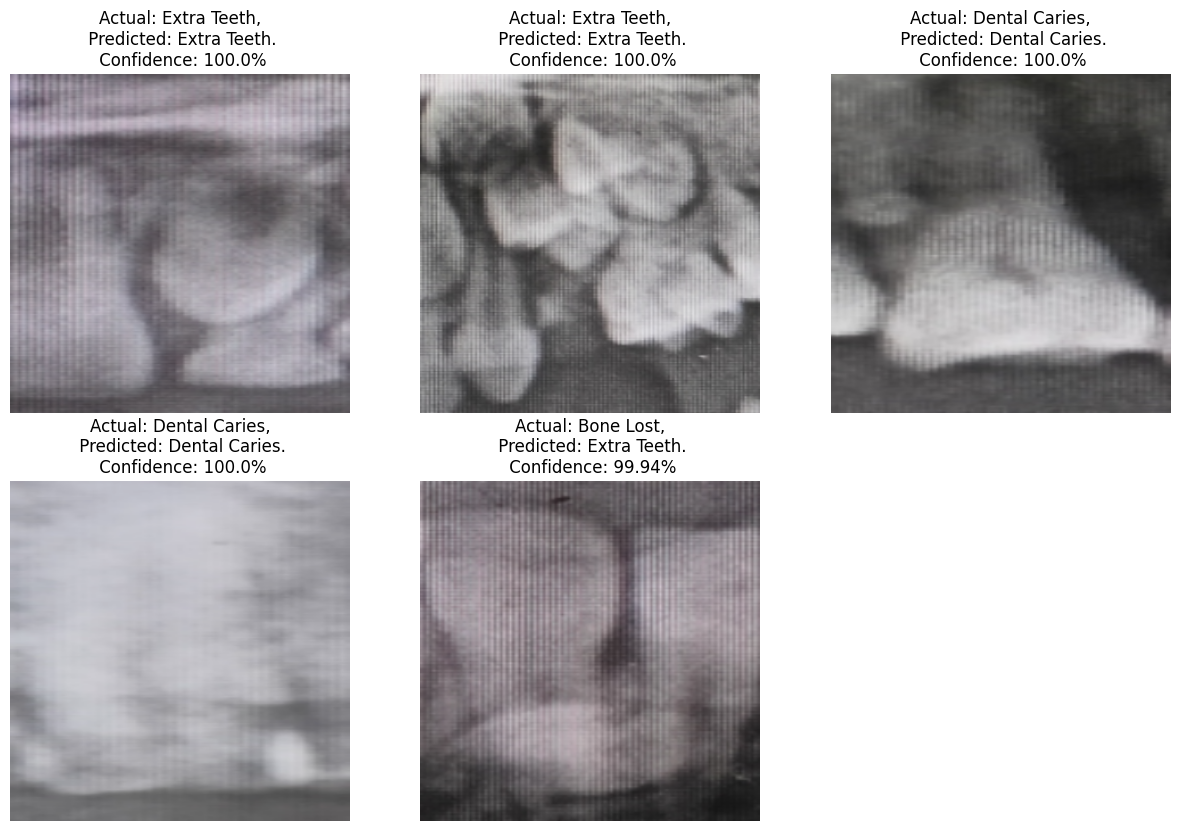

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")


        plt.axis("off")

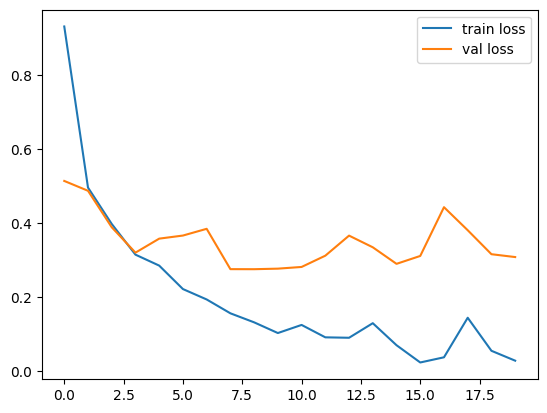

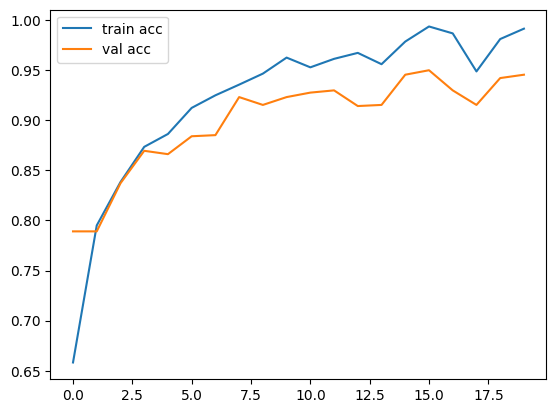

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    # print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 19ms/step


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [1.         0.96428571 0.91666667]
recall: [0.93333333 0.96428571 1.        ]
fscore: [0.96551724 0.96428571 0.95652174]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[28,  1,  1],
       [ 0, 27,  1],
       [ 0,  0, 22]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


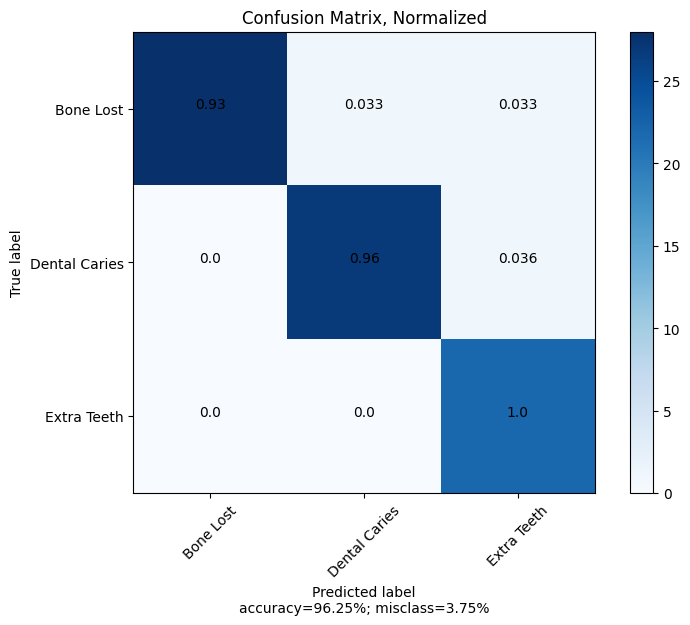

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

# VGG19

In [ ]:
#vgg19 model
conv_base = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
100/100 [==============================] - 44s 411ms/step - loss: 0.7679 - accuracy: 0.7013 - val_loss: 0.4687 - val_accuracy: 0.8158
Epoch 2/20
100/100 [==============================] - 41s 414ms/step - loss: 0.4760 - accuracy: 0.8085 - val_loss: 0.4564 - val_accuracy: 0.8136
Epoch 3/20
100/100 [==============================] - 41s 415ms/step - loss: 0.3665 - accuracy: 0.8445 - val_loss: 0.3407 - val_accuracy: 0.8694
Epoch 4/20
100/100 [==============================] - 41s 415ms/step - loss: 0.3142 - accuracy: 0.8746 - val_loss: 0.3318 - val_accuracy: 0.8638
Epoch 5/20
100/100 [==============================] - 41s 415ms/step - loss: 0.2462 - accuracy: 0.9009 - val_loss: 0.2715 - val_accuracy: 0.8984
Epoch 6/20
100/100 [==============================] - 41s 416ms/step - loss: 0.2219 - accuracy: 0.9157 - val_loss: 0.3245 - val_accuracy: 0.8828
Epoch 7/20
100/100 [==============================] - 41s 416ms/step - loss: 0.1629 - accuracy: 0.9373 - val_loss: 0.2760 - val_ac

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

16/16 [==============================] - 5s 326ms/step - loss: 0.3822 - accuracy: 0.9023


first image to predict
actual label: Extra Teeth
1/1 [==============================] - 0s 201ms/step
predicted label: Extra Teeth


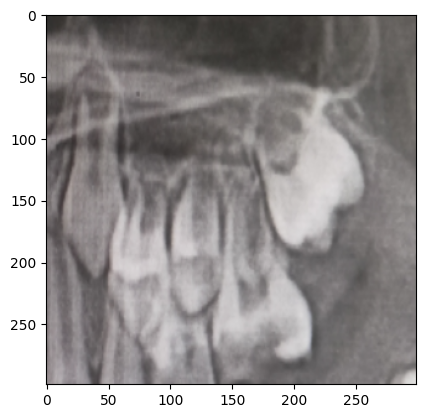

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


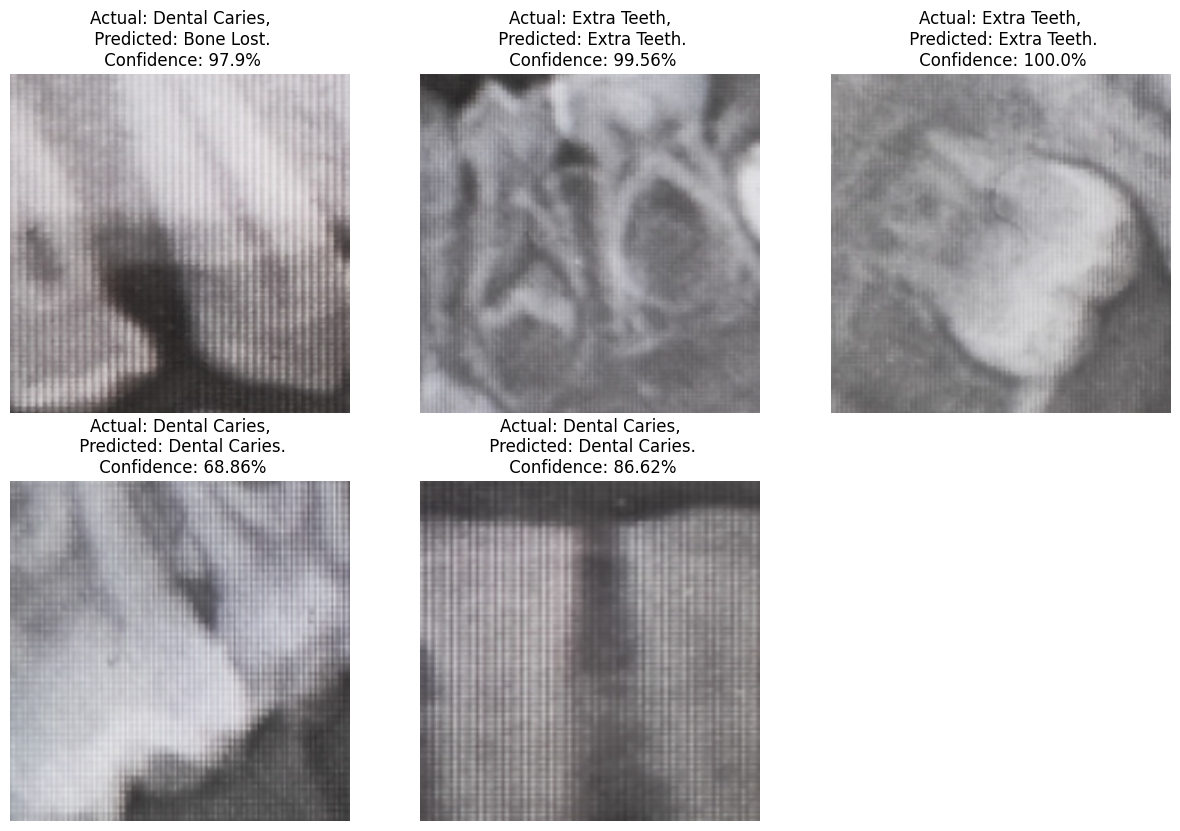

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

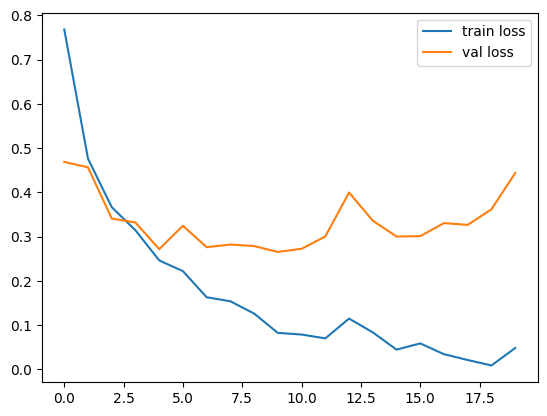

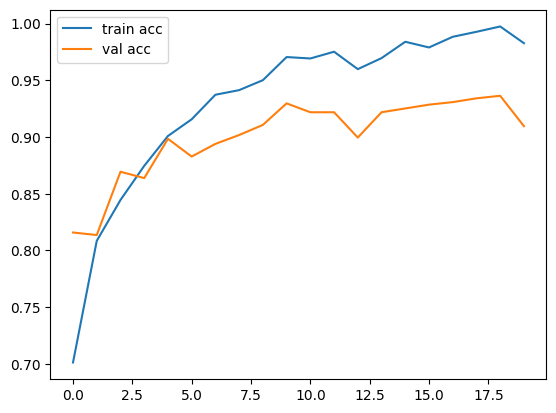

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 20ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 19ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 19ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 20ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 18ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 19ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 19ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 18ms/step
Bone Lost Bone Lost
1/1 [===

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.96774194 1.         1.        ]
recall: [1.         0.96428571 1.        ]
fscore: [0.98360656 0.98181818 1.        ]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[30,  0,  0],
       [ 1, 27,  0],
       [ 0,  0, 22]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


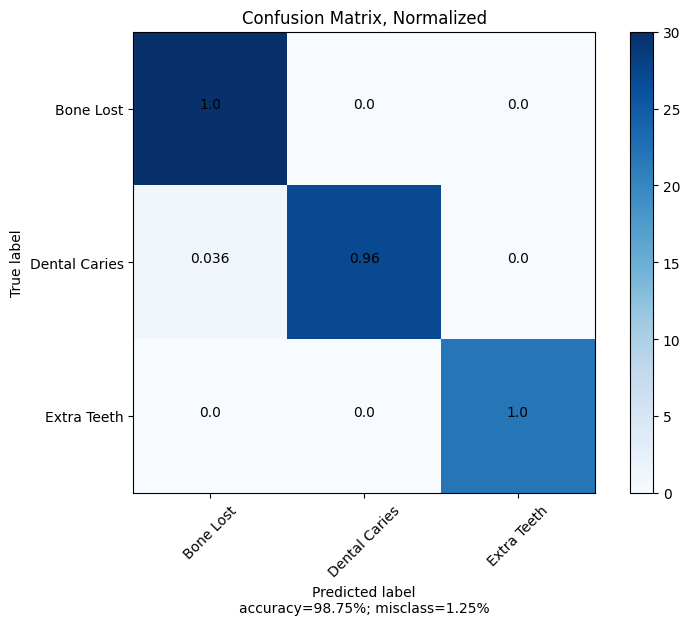

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted, target_names=class_name))

               precision    recall  f1-score   support

    Bone Lost       0.97      1.00      0.98        30
Dental Caries       1.00      0.96      0.98        28
  Extra Teeth       1.00      1.00      1.00        22

     accuracy                           0.99        80
    macro avg       0.99      0.99      0.99        80
 weighted avg       0.99      0.99      0.99        80

